In [1]:
import optuna.visualization.matplotlib as oplot
import optuna

In [8]:
stu = optuna.load_study(storage="sqlite:///NDC-classes.label.db", study_name="NDC-classes.label")

/tmp/ipykernel_199661/1279523480.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  oplot.plot_param_importances(stu)


<AxesSubplot:title={'center':'Hyperparameter Importances'}, xlabel='Importance for Objective Value', ylabel='Hyperparameter'>

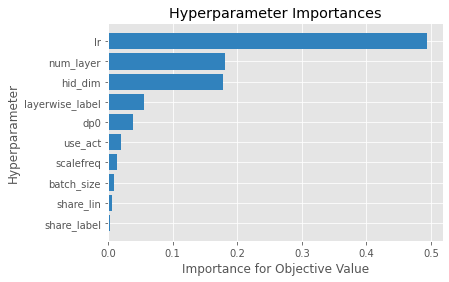

In [9]:
oplot.plot_param_importances(stu)

In [10]:
stu.best_params

{'batch_size': 96,
 'dp0': 0.1,
 'hid_dim': 112,
 'layerwise_label': True,
 'lr': 0.005,
 'num_layer': 4,
 'scalefreq': True,
 'share_label': True,
 'share_lin': False,
 'use_act': False}

In [5]:
import pandas as pd

In [6]:
df = stu.trials_dataframe()
df.sort_values(by="value", inplace=True, ascending=False)

In [7]:
df[:10]

,number,value,datetime_start,datetime_complete,duration,params_batch_size,params_dp0,params_hid_dim,params_layerwise_label,params_lr,params_num_layer,params_scalefreq,params_share_label,params_share_lin,params_use_act,state
41,41,0.787606,2022-09-19 19:40:25.068066,2022-09-19 20:00:13.240380,0 days 00:19:48.172314,96,0.10,128,True,0.0030,4,False,False,True,False,COMPLETE
1,1,0.785954,2022-09-19 16:03:27.088771,2022-09-19 16:15:51.396347,0 days 00:12:24.307576,48,0.00,48,True,0.0030,4,True,False,False,True,COMPLETE
35,35,0.783071,2022-09-19 18:58:50.119087,2022-09-19 19:20:48.792972,0 days 00:21:58.673885,80,0.15,128,True,0.0030,4,False,False,True,False,COMPLETE
16,16,0.782327,2022-09-19 16:53:41.013859,2022-09-19 17:22:29.714029,0 days 00:28:48.700170,16,0.15,96,True,0.0003,4,True,False,True,False,COMPLETE
38,38,0.780663,2022-09-19 19:20:48.876581,2022-09-19 19:40:24.960302,0 days 00:19:36.083721,96,0.15,128,True,0.0030,4,False,False,True,False,COMPLETE
18,18,0.779400,2022-09-19 16:58:20.712416,2022-09-19 17:28:44.310963,0 days 00:30:23.598547,16,0.20,96,True,0.0003,4,False,False,False,True,COMPLETE
31,31,0.777721,2022-09-19 18:34:13.776319,2022-09-19 19:08:27.191385,0 days 00:34:13.415066,48,0.30,112,True,0.0010,4,True,False,False,True,COMPLETE
2,2,0.774978,2022-09-19 16:10:16.068337,2022-09-19 16:32:19.533347,0 days 00:22:03.465010,64,0.15,112,True,0.0030,4,False,False,True,False,COMPLETE
36,36,0.771694,2022-09-19 19:07:06.559619,2022-09-19 19:32:10.408828,0 days 00:25:03.849209,80,0.15,128,True,0.0030,4,False,False,True,False,COMPLETE
10,10,0.771385,2022-09-19 16:29:38.785291,2022-09-19 16:58:20.655499,0 days 00:28:41.870208,32,0.30,128,False,0.0100,4,True,True,False,False,COMPLETE


In [23]:
stu.best_params

{'aggr': 2,
 'batch_size': 48,
 'hid_dim': 128,
 'init': 'random',
 'lr': 0.003,
 'num_layer': 2,
 'pool': 1}

In [22]:
df.iloc[:10, 5:]

,params_aggr,params_batch_size,params_hid_dim,params_init,params_lr,params_num_layer,params_pool,state
638,2,48,128,random,0.003,2,1,COMPLETE
223,3,48,128,random,0.003,2,1,COMPLETE
589,3,48,128,random,0.003,2,1,COMPLETE
229,3,48,128,random,0.003,2,1,COMPLETE
804,5,64,128,random,0.003,2,1,COMPLETE
339,3,112,128,random,0.003,2,1,COMPLETE
516,5,48,128,random,0.003,2,1,COMPLETE
635,2,48,128,random,0.003,2,1,COMPLETE
333,3,96,128,random,0.003,2,1,COMPLETE
711,3,48,128,random,0.003,2,1,COMPLETE


In [1]:
import subprocess
import torch
import torch_sparse
from torch_sparse import SparseTensor
from itertools import count
from typing import List, Set, Tuple

In [7]:
dslist = ["DAWN", "email-Eu", "NDC-classes", "NDC-substances", 
    "threads-ask-ubuntu", "threads-math-sx", "tags-ask-ubuntu", "tags-math-sx"]
dslist2 = ["email-Enron", "contact-high-school", "congress-bills", "NDC-classes"]

In [9]:
for ds in dslist:
    subprocess.call(f"gunzip ScHoLP-Data/{ds}/{ds}-nverts.txt.gz", shell=True)
    subprocess.call(f"gunzip ScHoLP-Data/{ds}/{ds}-node-labels.txt.gz", shell=True)
    subprocess.call(f"gunzip ScHoLP-Data/{ds}/{ds}-simplices.txt.gz", shell=True)

gzip: ScHoLP-Data/DAWN/DAWN-nverts.txt.gz: No such file or directory
gzip: ScHoLP-Data/DAWN/DAWN-node-labels.txt.gz: No such file or directory
gzip: ScHoLP-Data/DAWN/DAWN-simplices.txt.gz: No such file or directory
gzip: ScHoLP-Data/email-Eu/email-Eu-nverts.txt.gz: No such file or directory
gzip: ScHoLP-Data/email-Eu/email-Eu-node-labels.txt.gz: No such file or directory
gzip: ScHoLP-Data/email-Eu/email-Eu-simplices.txt.gz: No such file or directory
gzip: ScHoLP-Data/NDC-classes/NDC-classes-nverts.txt.gz: No such file or directory
gzip: ScHoLP-Data/NDC-classes/NDC-classes-node-labels.txt.gz: No such file or directory
gzip: ScHoLP-Data/NDC-classes/NDC-classes-simplices.txt.gz: No such file or directory
gzip: ScHoLP-Data/NDC-substances/NDC-substances-nverts.txt.gz: No such file or directory
gzip: ScHoLP-Data/NDC-substances/NDC-substances-node-labels.txt.gz: No such file or directory
gzip: ScHoLP-Data/NDC-substances/NDC-substances-simplices.txt.gz: No such file or directory
gzip: ScHoLP-D

In [3]:
import numpy as np

In [ ]:
from torch import Tensor
import numpy as np
def uniqueedge(rowptr: Tensor, col: Tensor):
    edges = []
    for i in range(len(rowptr)-1):
        tmp: np.ndarray =col[rowptr[i]: rowptr[i+1]].numpy()
        edges.append(tuple(sorted(tmp.tolist())))
    edges = list(set(edges))
    rowptr = torch.tensor([0] + [len(_) for _ in edges]).cumsum_(dim=0)
    col = torch.tensor([b for a in edges for b in a])
    return rowptr, col

In [21]:
for ds in dslist:
    with open(f"ScHoLP-Data/{ds}/{ds}-nverts.txt") as f:
        nverts = torch.tensor([0]+[int(_) for _ in f.readlines()])
    with open(f"ScHoLP-Data/{ds}/{ds}-simplices.txt") as f:
        edge = torch.tensor([int(_) for _ in f.readlines()])
    inci = SparseTensor(rowptr=torch.cumsum(nverts, dim=0), col=edge).coalesce()
    deg = inci.sum(dim=1)
    inci = inci[deg>1.5]
    deg = inci.sum(dim=0)
    mask = deg>0
    inci = inci[:, mask]
    rowptr, col = uniqueedge(*(inci.csr()[:-1]))
    torch.save((rowptr, col),f"data/{ds}.pt")

In [22]:
for ds in dslist:
    loaded_data = torch.load(f"data/{ds}.pt")
    inci = SparseTensor(rowptr=loaded_data[0], col=loaded_data[1])
    deg = inci.sum(dim=1)
    print(ds, inci.sizes(), deg.max(), deg.min())

DAWN [138742, 2290] tensor(16.) tensor(2.)
email-Eu [24399, 979] tensor(25.) tensor(2.)
NDC-classes [1047, 1149] tensor(24.) tensor(2.)
NDC-substances [6264, 3438] tensor(25.) tensor(2.)
threads-ask-ubuntu [115987, 90054] tensor(14.) tensor(2.)
threads-math-sx [535323, 153806] tensor(21.) tensor(2.)
tags-ask-ubuntu [145053, 3021] tensor(5.) tensor(2.)
tags-math-sx [169259, 1627] tensor(5.) tensor(2.)


In [24]:
import random

In [ ]:
def sparse2tuplelist(inci: SparseTensor):
    edges = []
    for i in range(len(rowptr)-1):
        tmp: np.ndarray =col[rowptr[i]: rowptr[i+1]].numpy()
        edges.append(tuple(sorted(tmp.tolist())))
    return edges

def tuplelist2sparse(edges: List[Tuple]):
    rowptr = torch.tensor([0] + [len(_) for _ in edges]).cumsum_(dim=0)
    col = torch.tensor([b for a in edges for b in a])
    return SparseTensor(rowptr=rowptr, col=col)

def neg_sample(num_nodes: int, k: int, base_hyperedges: Set[Tuple], tar_hyperedges: List[Tuple])->List[Tuple]:
    negatives = []
    for tar in tar_hyperedges:
        cnt = 0
        while cnt<k:
            one_neg = list(tar)
            id_to_change = random.randint(0, len(tar)-1)
            one_neg[id_to_change] = random.randint(0, num_nodes-1)
            one_neg = tuple(sorted(one_neg))
            if one_neg not in base_hyperedges:
                negatives.append(one_neg)
                cnt += 1
    return negatives